In [1]:
!git config --global url."https://ghproxy.com/https://github.com".insteadOf "https://github.com"

In [2]:
! git clone https://github.com/huggingface/diffusers


Cloning into 'diffusers'...
remote: Enumerating objects: 25175, done.
remote: Counting objects: 100% (833/833), done.
remote: Compressing objects: 100% (366/366), done.
remote: Total 25175 (delta 520), reused 659 (delta 420), pack-reused 24342
Receiving objects: 100% (25175/25175), 31.43 MiB | 6.24 MiB/s, done.
Resolving deltas: 100% (18140/18140), done.


In [3]:

import diffusers

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
! cd diffusers/examples/text_to_image && pip install -r requirements.txt

Looking in indexes: https://mirrors.cloud.aliyuncs.com/pypi/simple

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [14]:
! git clone https://github.com/AUTOMATIC1111/stable-diffusion-webui.git && \
cd stable-diffusion-webui && \
git checkout a9fed7c364061ae6efb37f797b6b522cb3cf7aa2
! cd stable-diffusion-webui && mkdir -p repositories && cd repositories && \
git clone https://github.com/sczhou/CodeFormer.git

fatal: destination path 'stable-diffusion-webui' already exists and is not an empty directory.
Cloning into 'CodeFormer'...
remote: Enumerating objects: 580, done.
remote: Counting objects: 100% (231/231), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 580 (delta 169), reused 169 (delta 150), pack-reused 349
Receiving objects: 100% (580/580), 17.30 MiB | 1.73 MiB/s, done.
Resolving deltas: 100% (280/280), done.


In [6]:
! wget http://pai-vision-data-hz.oss-cn-zhangjiakou.aliyuncs.com/EasyCV/datasets/try_on/cloth_train_example.tar.gz && tar -xvf cloth_train_example.tar.gz
! wget http://pai-vision-data-hz.oss-cn-zhangjiakou.aliyuncs.com/EasyCV/datasets/try_on/train_text_to_image_lora.py

cloth_train_example 100%[===================>]   4.54M   402KB/s    in 13s     

2023-04-29 02:47:36 (368 KB/s) - ‘cloth_train_example.tar.gz’ saved [4755690/4755690]

cloth_train_example/
cloth_train_example/train/
cloth_train_example/train/20230407174322.jpg
cloth_train_example/train/metadata.jsonl
cloth_train_example/train/20230407174421.jpg
cloth_train_example/train/20230407174403.jpg
cloth_train_example/train/20230407174429.jpg
cloth_train_example/train/20230407174311.jpg
cloth_train_example/train/20230407174332.jpg
cloth_train_example/train/20230407174450.jpg
cloth_train_example/train/.ipynb_checkpoints/
cloth_train_example/train/.ipynb_checkpoints/20230407174332-checkpoint.jpg
cloth_train_example/train/20230407174343.jpg
cloth_train_example/train/20230407174354.jpg
cloth_train_example/train/20230407174413.jpg
cloth_train_example/train/20230407174439.jpg
cloth_train_example/.ipynb_checkpoints/
--2023-04-29 02:47:36--  http://pai-vision-data-hz.oss-cn-zhangjiakou.aliyuncs.com/Easy

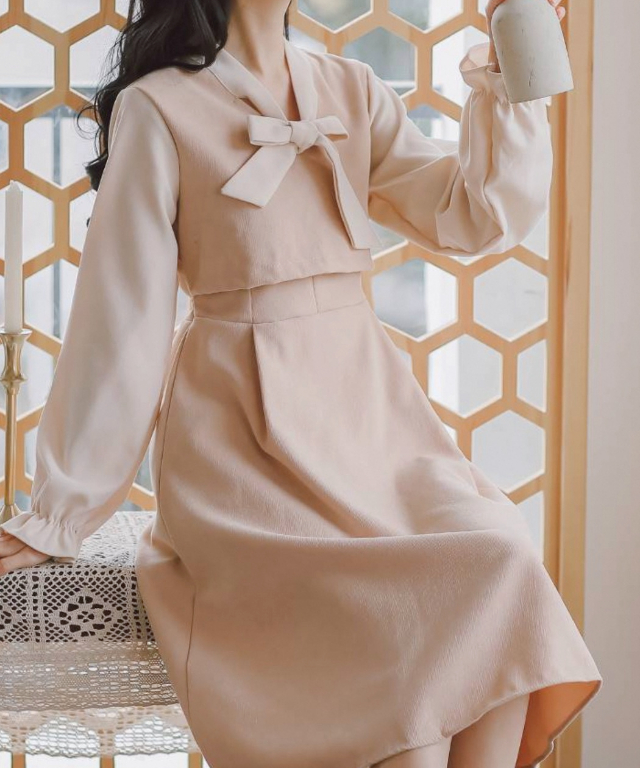

In [7]:
from PIL import Image
display(Image.open("cloth_train_example/train/20230407174450.jpg"))

In [8]:
! cd stable-diffusion-webui/models/Stable-diffusion && wget -c https://huggingface.co/naonovn/chilloutmix_NiPrunedFp32Fix/resolve/main/chilloutmix_NiPrunedFp32Fix.safetensors -O chilloutmix_NiPrunedFp32Fix.safetensors
! python diffusers/scripts/convert_original_stable_diffusion_to_diffusers.py \
--checkpoint_path=stable-diffusion-webui/models/Stable-diffusion/chilloutmix_NiPrunedFp32Fix.safetensors \
--dump_path=chilloutmix-ni --from_safetensors


--2023-04-29 02:47:36--  https://huggingface.co/naonovn/chilloutmix_NiPrunedFp32Fix/resolve/main/chilloutmix_NiPrunedFp32Fix.safetensors
Resolving huggingface.co (huggingface.co)... 99.84.50.34, 99.84.50.125, 99.84.50.78, ...
Connecting to huggingface.co (huggingface.co)|99.84.50.34|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/a3/31/a331cb67b63a77eb6d5332fa0aa0077a5a164e9d62ec85442c00c63d4fdf77b5/fc2511737a54c5e80b89ab03e0ab4b98d051ab187f92860f3cd664dc9d08b271?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27chilloutmix_NiPrunedFp32Fix.safetensors%3B+filename%3D%22chilloutmix_NiPrunedFp32Fix.safetensors%22%3B&Expires=1682995644&Policy=eyJTdGF0ZW1lbnQiOlt7IlJlc291cmNlIjoiaHR0cHM6Ly9jZG4tbGZzLmh1Z2dpbmdmYWNlLmNvL3JlcG9zL2EzLzMxL2EzMzFjYjY3YjYzYTc3ZWI2ZDUzMzJmYTBhYTAwNzdhNWExNjRlOWQ2MmVjODU0NDJjMDBjNjNkNGZkZjc3YjUvZmMyNTExNzM3YTU0YzVlODBiODlhYjAzZTBhYjRiOThkMDUxYWIxODdmOTI4NjBmM2NkNjY0ZGM5ZDA4YjI3MT9yZ

In [9]:
! export MODEL_NAME="chilloutmix-ni" && \
export DATASET_NAME="cloth_train_example" && \
accelerate launch --mixed_precision="fp16" train_text_to_image_lora.py \
  --pretrained_model_name_or_path=$MODEL_NAME \
  --dataset_name=$DATASET_NAME --caption_column="text" \
  --width=640 --height=768 --random_flip \
  --train_batch_size=1 \
  --num_train_epochs=200 --checkpointing_steps=5000 \
  --learning_rate=1e-04 --lr_scheduler="constant" --lr_warmup_steps=0 \
  --seed=42 \
  --output_dir="cloth-model-lora" \
  --validation_prompt="cloth1" --validation_epochs=100

[03:02:50] WARNING  The following values were not passed to        ]8;id=54679;file:///usr/local/lib/python3.10/dist-packages/accelerate/commands/launch.py\launch.py]8;;\:]8;id=736615;file:///usr/local/lib/python3.10/dist-packages/accelerate/commands/launch.py#895\895]8;;\
                    `accelerate launch` and had defaults used                   
                    instead:                                                    
                            `--num_processes` was set to a value                
                    of `1`                                                      
                            `--num_machines` was set to a value of              
                    `1`                                                         
                            `--dynamo_backend` was set to a value               
                    of `'no'`                                                   
                    To avoid this warning pass in values for each     

In [10]:
! wget -c http://pai-vision-data-hz.oss-cn-zhangjiakou.aliyuncs.com/EasyCV/datasets/convert-to-safetensors.py
! python convert-to-safetensors.py --file='cloth-model-lora/pytorch_lora_weights.bin'
! mkdir stable-diffusion-webui/models/Lora
! cp cloth-model-lora/pytorch_lora_weights_converted.safetensors stable-diffusion-webui/models/Lora/cloth_lora_weights.safetensors

--2023-04-29 03:19:46--  http://pai-vision-data-hz.oss-cn-zhangjiakou.aliyuncs.com/EasyCV/datasets/convert-to-safetensors.py
Resolving pai-vision-data-hz.oss-cn-zhangjiakou.aliyuncs.com (pai-vision-data-hz.oss-cn-zhangjiakou.aliyuncs.com)... 39.98.20.13
Connecting to pai-vision-data-hz.oss-cn-zhangjiakou.aliyuncs.com (pai-vision-data-hz.oss-cn-zhangjiakou.aliyuncs.com)|39.98.20.13|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2032 (2.0K) [application/octet-stream]
Saving to: ‘convert-to-safetensors.py’

convert-to-safetens 100%[===================>]   1.98K  --.-KB/s    in 0s      

2023-04-29 03:19:46 (651 MB/s) - ‘convert-to-safetensors.py’ saved [2032/2032]

device is cuda
Saving cloth-model-lora/pytorch_lora_weights_converted.safetensors


In [11]:
! mkdir stable-diffusion-webui/models/Codeformer
! cd stable-diffusion-webui/repositories/CodeFormer/weights/facelib/ && \
wget -c http://pai-vision-data-hz.oss-cn-zhangjiakou.aliyuncs.com/EasyCV/datasets/try_on/detection_Resnet50_Final.pth && \
wget -c http://pai-vision-data-hz.oss-cn-zhangjiakou.aliyuncs.com/EasyCV/datasets/try_on/parsing_parsenet.pth
! cd stable-diffusion-webui/models/Codeformer && wget -c http://pai-vision-data-hz.oss-cn-zhangjiakou.aliyuncs.com/EasyCV/datasets/try_on/codeformer-v0.1.0.pth
! cd stable-diffusion-webui/embeddings && wget -c http://pai-vision-data-hz.oss-cn-zhangjiakou.aliyuncs.com/EasyCV/datasets/try_on/ng_deepnegative_v1_75t.pt
! cd stable-diffusion-webui/models/Lora && wget -c https://huggingface.co/Kanbara/doll-likeness-series/resolve/main/koreanDollLikeness_v10.safetensors

/usr/bin/sh: 1: cd: can't cd to stable-diffusion-webui/repositories/CodeFormer/weights/facelib/
--2023-04-29 03:19:49--  http://pai-vision-data-hz.oss-cn-zhangjiakou.aliyuncs.com/EasyCV/datasets/try_on/codeformer-v0.1.0.pth
Resolving pai-vision-data-hz.oss-cn-zhangjiakou.aliyuncs.com (pai-vision-data-hz.oss-cn-zhangjiakou.aliyuncs.com)... 39.98.20.13
Connecting to pai-vision-data-hz.oss-cn-zhangjiakou.aliyuncs.com (pai-vision-data-hz.oss-cn-zhangjiakou.aliyuncs.com)|39.98.20.13|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 376637898 (359M) [application/octet-stream]
Saving to: ‘codeformer-v0.1.0.pth’

codeformer-v0.1.0.p 100%[===================>] 359.19M  13.4MB/s    in 21s     

2023-04-29 03:20:10 (17.1 MB/s) - ‘codeformer-v0.1.0.pth’ saved [376637898/376637898]

--2023-04-29 03:20:10--  http://pai-vision-data-hz.oss-cn-zhangjiakou.aliyuncs.com/EasyCV/datasets/try_on/ng_deepnegative_v1_75t.pt
Resolving pai-vision-data-hz.oss-cn-zhangjiakou.aliyuncs.com (pa

In [ ]:
! cd stable-diffusion-webui && git clone https://github.com/CompVis/taming-transformers.git repositories/taming-transformers
! cd stable-diffusion-webui && python -m venv --system-site-packages --symlinks venv
! cd stable-diffusion-webui && \
  sed -i 's/can_run_as_root=0/can_run_as_root=1/g' webui.sh && \
  ./webui.sh --no-download-sd-model --xformers

fatal: destination path 'repositories/taming-transformers' already exists and is not an empty directory.

################################################################
Install script for stable-diffusion + Web UI
Tested on Debian 11 (Bullseye)
################################################################

################################################################
Running on root user
################################################################

################################################################
Repo already cloned, using it as install directory
################################################################

################################################################
Create and activate python venv
################################################################

################################################################
Launching launch.py...
################################################################
Python 3.10.6 (main, Mar 10 2023, 10:

In [13]:
!cd stable-diffusion-webui/models/VAE && wget -c https://huggingface.co/stabilityai/sd-vae-ft-mse-original/resolve/main/vae-ft-mse-840000-ema-pruned.safetensors

--2023-04-29 03:25:55--  https://huggingface.co/stabilityai/sd-vae-ft-mse-original/resolve/main/vae-ft-mse-840000-ema-pruned.safetensors
Resolving huggingface.co (huggingface.co)... 13.225.183.25, 13.225.183.47, 13.225.183.61, ...
Connecting to huggingface.co (huggingface.co)|13.225.183.25|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/ec/ee/eceee26c5834d8a75cf04eeb17dfc06d1d5fe1d80c2f19520b148c11e2e98c45/735e4c3a447a3255760d7f86845f09f937809baa529c17370d83e4c3758f3c75?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27vae-ft-mse-840000-ema-pruned.safetensors%3B+filename%3D%22vae-ft-mse-840000-ema-pruned.safetensors%22%3B&Expires=1682995028&Policy=eyJTdGF0ZW1lbnQiOlt7IlJlc291cmNlIjoiaHR0cHM6Ly9jZG4tbGZzLmh1Z2dpbmdmYWNlLmNvL3JlcG9zL2VjL2VlL2VjZWVlMjZjNTgzNGQ4YTc1Y2YwNGVlYjE3ZGZjMDZkMWQ1ZmUxZDgwYzJmMTk1MjBiMTQ4YzExZTJlOThjNDUvNzM1ZTRjM2E0NDdhMzI1NTc2MGQ3Zjg2ODQ1ZjA5ZjkzNzgwOWJhYTUyOWMxNzM3MGQ4M2U0YzM3NThm